In [16]:
"""2) Data Wrangling II
create "acdemic performance" datasets od student and perform the following operations usingPython.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/orinconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniquesto deal with them.
3. Apply data transformations on at least one of the variables. The purpose of thistransformation should be one of the following reasons: to change the scale for betterunderstanding of the variable, to convert a non-linear relation into a linear one, or to decreasethe skewness and convert the distribution into a normal distribution.
Reason and document your approach properly."""

import pandas as pd
import numpy as np

# Create simple dataset
import pandas as pd
import numpy as np

data = {
    "Name": ["A", "B", "C", "D", "E", "F", "G", "H"],
    "Gender": ["Male", "Female", "male ", "Female", "Male", "FEMALE", "Male", "Female"],
    "Study_Hours": [2, 5, 8, 3, np.nan, 15, 4, 6],
    "Math_Score": [40, 50, 95, 60, 70, 200, 55, np.nan],
    "Attendance": [70, 80, 90, np.nan, 85, 95, 60, 75]
}

df = pd.DataFrame(data)
print(df)


  Name  Gender  Study_Hours  Math_Score  Attendance
0    A    Male          2.0        40.0        70.0
1    B  Female          5.0        50.0        80.0
2    C   male           8.0        95.0        90.0
3    D  Female          3.0        60.0         NaN
4    E    Male          NaN        70.0        85.0
5    F  FEMALE         15.0       200.0        95.0
6    G    Male          4.0        55.0        60.0
7    H  Female          6.0         NaN        75.0


In [17]:
#1) Check Missing Values & Inconsistencies
print(df.isnull().sum())

Name           0
Gender         0
Study_Hours    1
Math_Score     1
Attendance     1
dtype: int64


In [18]:
#Handle Missing Values

#We fill missing numeric values using mean.
df["Study_Hours"] = df["Study_Hours"].fillna(df["Study_Hours"].mean())
df["Math_Score"] = df["Math_Score"].fillna(df["Math_Score"].mean())
df["Attendance"] = df["Attendance"].fillna(df["Attendance"].mean())

print(df)

  Name  Gender  Study_Hours  Math_Score  Attendance
0    A    Male     2.000000   40.000000   70.000000
1    B  Female     5.000000   50.000000   80.000000
2    C   male      8.000000   95.000000   90.000000
3    D  Female     3.000000   60.000000   79.285714
4    E    Male     6.142857   70.000000   85.000000
5    F  FEMALE    15.000000  200.000000   95.000000
6    G    Male     4.000000   55.000000   60.000000
7    H  Female     6.000000   81.428571   75.000000


In [11]:
#Step 1.2 Fix Inconsistent Values (Gender column)
print(df["Gender"].unique())


['Male' 'Female' 'male ' 'FEMALE']


In [21]:

#Fix inconsistent text:
# Fix inconsistent text in Gender column
df["Gender"] = df["Gender"].str.strip().str.capitalize()
print(df["Gender"].unique())
print(df)

#To remove extra spaces and make all values same format
#Example: "male ", "FEMALE" → "Male", "Female"

['Male' 'Female']
  Name  Gender  Study_Hours  Math_Score  Attendance
0    A    Male     2.000000   40.000000   70.000000
1    B  Female     5.000000   50.000000   80.000000
2    C    Male     8.000000   95.000000   90.000000
3    D  Female     3.000000   60.000000   79.285714
4    E    Male     6.142857   70.000000   85.000000
5    F  Female    15.000000  200.000000   95.000000
6    G    Male     4.000000   55.000000   60.000000
7    H  Female     6.000000   81.428571   75.000000


In [22]:
#2) Detect and Remove Outliers
#We see 200 in Math_Score which is unrealistic (outlier).
#Use IQR Method
Q1 = df["Math_Score"].quantile(0.25)
Q3 = df["Math_Score"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df["Math_Score"] >= lower) & (df["Math_Score"] <= upper)]
print(df)
#Reason:

#IQR method removes extreme values safely.
#200 is removed because it is too large.

  Name  Gender  Study_Hours  Math_Score  Attendance
0    A    Male     2.000000   40.000000   70.000000
1    B  Female     5.000000   50.000000   80.000000
2    C    Male     8.000000   95.000000   90.000000
3    D  Female     3.000000   60.000000   79.285714
4    E    Male     6.142857   70.000000   85.000000
6    G    Male     4.000000   55.000000   60.000000
7    H  Female     6.000000   81.428571   75.000000


In [24]:
#3) Data Transformation
#We will transform Study_Hours using Log transformation.
#Apply Log Transformation
df["Log_Study_Hours"] = np.log1p(df["Study_Hours"])
print(df)

  Name  Gender  Study_Hours  Math_Score  Attendance  Log_Study_Hours
0    A    Male     2.000000   40.000000   70.000000         0.693147
1    B  Female     5.000000   50.000000   80.000000         1.609438
2    C    Male     8.000000   95.000000   90.000000         2.079442
3    D  Female     3.000000   60.000000   79.285714         1.098612
4    E    Male     6.142857   70.000000   85.000000         1.815290
6    G    Male     4.000000   55.000000   60.000000         1.386294
7    H  Female     6.000000   81.428571   75.000000         1.791759


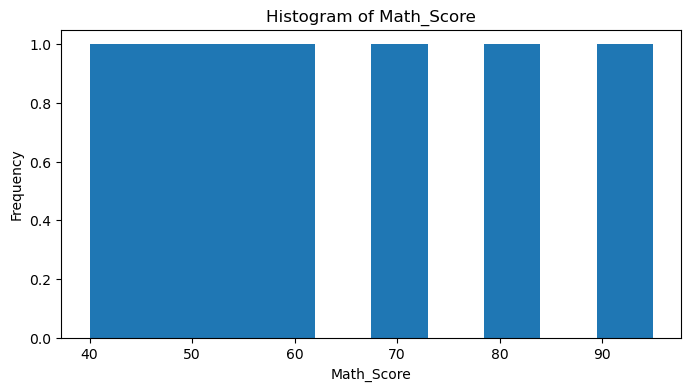

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
df["Math_Score"].plot(kind="hist", bins=10, title="Histogram of Math_Score")
plt.xlabel("Math_Score")
plt.show()

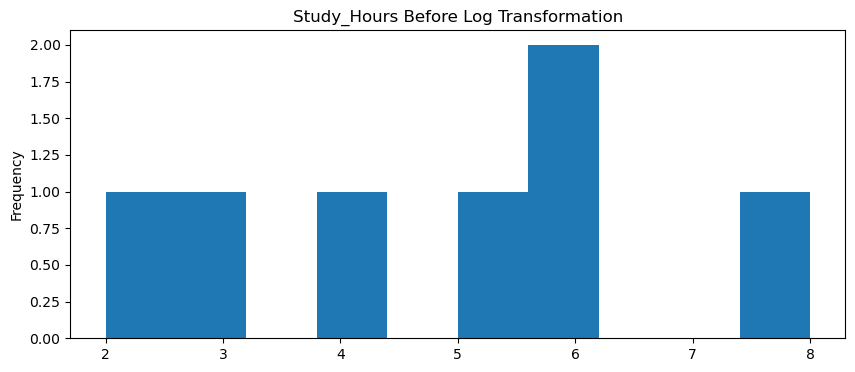

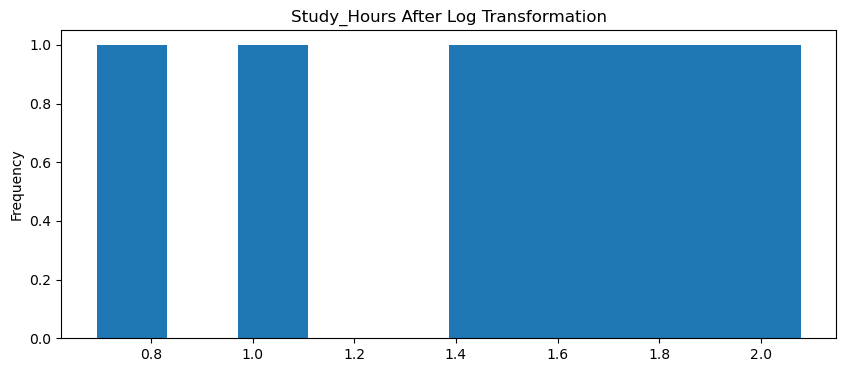

In [31]:
# Histogram before transformation
plt.figure(figsize=(10,4))
df["Study_Hours"].plot(kind="hist", bins=10, title="Study_Hours Before Log Transformation")
plt.show()

# Histogram after transformation
plt.figure(figsize=(10,4))
df["Log_Study_Hours"].plot(kind="hist", bins=10, title="Study_Hours After Log Transformation")
plt.show()
